<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Mexican-hat-shaped-base-curves" data-toc-modified-id="Mexican-hat-shaped-base-curves-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mexican-hat-shaped base curves</a></span></li><li><span><a href="#plot-base-set" data-toc-modified-id="plot-base-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot base set</a></span></li><li><span><a href="#Moment-Computing" data-toc-modified-id="Moment-Computing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Moment Computing</a></span></li><li><span><a href="#Build-a-dataset" data-toc-modified-id="Build-a-dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build a dataset</a></span></li><li><span><a href="#Data-augmentation-using-SMOTE" data-toc-modified-id="Data-augmentation-using-SMOTE-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data augmentation using SMOTE</a></span></li><li><span><a href="#Principal-Component-analysis" data-toc-modified-id="Principal-Component-analysis-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Principal Component analysis</a></span></li></ul></li><li><span><a href="#Predictive-models" data-toc-modified-id="Predictive-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive models</a></span><ul class="toc-item"><li><span><a href="#binary-Classification" data-toc-modified-id="binary-Classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>binary Classification</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Neural Networks</a></span><ul class="toc-item"><li><span><a href="#sklearn" data-toc-modified-id="sklearn-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>sklearn</a></span></li><li><span><a href="#tensorflow" data-toc-modified-id="tensorflow-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>tensorflow</a></span></li></ul></li></ul></li><li><span><a href="#Multiclass-Classification" data-toc-modified-id="Multiclass-Classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multiclass Classification</a></span><ul class="toc-item"><li><span><a href="#sub-groups-Classification" data-toc-modified-id="sub-groups-Classification-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>sub-groups Classification</a></span></li><li><span><a href="#multi-class-classification" data-toc-modified-id="multi-class-classification-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>multi-class classification</a></span><ul class="toc-item"><li><span><a href="#Distance-based-Classification" data-toc-modified-id="Distance-based-Classification-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Distance-based Classification</a></span></li><li><span><a href="#Direction-based-Classification" data-toc-modified-id="Direction-based-Classification-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Direction-based Classification</a></span></li></ul></li><li><span><a href="#One-vs-Rest-Classifier" data-toc-modified-id="One-vs-Rest-Classifier-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>One vs Rest Classifier</a></span></li></ul></li><li><span><a href="#CNN-(1D)" data-toc-modified-id="CNN-(1D)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CNN (1D)</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LSTM</a></span></li></ul></li></ul></div>

## Feature Engineering 

In [1]:
import pickle
import dill 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
#import seaborn as sns 
import os 
from collections import OrderedDict
from collections import Counter

%matplotlib inline 

# from scipy import fftpack
# from scipy.fftpack import fft, ifft
# from scipy import signal
# from scipy.optimize import curve_fit

from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf 
np.set_printoptions(precision=4)

import matplotlib as mpl

label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
motions = dill.load(open("motions070120.pickle", "rb"))

### Mexican-hat-shaped base curves 

fast/LR/1m, 1, : 18.534395606197585


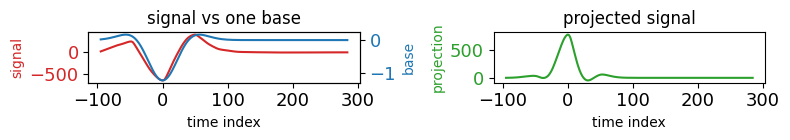

In [3]:
def base_Mexican_hat(x_range, a=40, b=5):
    A = 2/np.sqrt(3*a)*np.pi**(1/4)*b
    return -A*(1 - x_range**2/a**2)*np.exp(-x_range**2/a**2)


def plot_signal_with_base(base, class_name, curve_num):
    
    fig = plt.figure(figsize=(8,1.5), dpi=100, constrained_layout=False)
    axs = fig.subplots(1, 2)
    
#    fig, ax1 = plt.subplots(figsize=(4,1.5), dpi=100)

    X_ = motions.filteredMotions[class_name][curve_num]

    direction = class_name.split("/")[1]
    if direction == "LR":
        loc_peak = np.argmin(X_)
        phase = 1 
    else:
        loc_peak = np.argmax(X_)
        phase = -1
        
    x_range = np.arange(-loc_peak, loc_peak*3)
    y_signal = X_[:len(x_range)]
    y_base = phase * base(x_range)
    y_moment_computing = y_signal*y_base 
        
    color = 'tab:red'
    axs[0].set_xlabel('time index')
    axs[0].set_ylabel('signal', color=color)
    axs[0].plot(x_range, y_signal, color=color)
    axs[0].tick_params(axis='y', labelcolor=color)
    axs[0].set_title('signal vs one base')
    ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('base', color=color)  # we already handled the x-label with ax1
    ax2.plot(x_range, y_base, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    color = 'tab:green'
    axs[1].set_xlabel('time index')
    axs[1].set_ylabel('projection', color=color)
    axs[1].plot(x_range, y_moment_computing, color=color)
    axs[1].tick_params(axis='y', labelcolor=color)
    axs[1].set_title('projected signal')
    moment_computing = np.dot(x_range, y_base)
    print("{}, {}, : {}".format(class_name, curve_num, moment_computing))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()    
    
plot_signal_with_base(base_Mexican_hat, 'fast/LR/1m', 1)

fast/RL/1m, 1, : -105.05148278144785


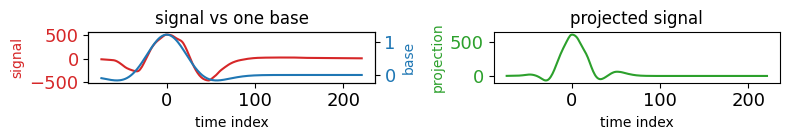

In [4]:
plot_signal_with_base(base_Mexican_hat, 'fast/RL/1m', 1)

In [5]:
classes_dict = {class_name: i for i,class_name in enumerate(motions.classes)} 
classes_dict    

{'fast/LR/1m': 0,
 'fast/LR/2m': 1,
 'fast/LR/3m': 2,
 'fast/LR/4m': 3,
 'fast/LR/5m': 4,
 'fast/LR/left': 5,
 'fast/LR/right': 6,
 'fast/RL/1m': 7,
 'fast/RL/2m': 8,
 'fast/RL/3m': 9,
 'fast/RL/4m': 10,
 'fast/RL/5m': 11,
 'fast/RL/left': 12,
 'fast/RL/right': 13,
 'slow/LR/1m': 14,
 'slow/LR/2m': 15,
 'slow/LR/3m': 16,
 'slow/LR/4m': 17,
 'slow/LR/5m': 18,
 'slow/LR/left': 19,
 'slow/LR/right': 20,
 'slow/RL/1m': 21,
 'slow/RL/2m': 22,
 'slow/RL/3m': 23,
 'slow/RL/4m': 24,
 'slow/RL/5m': 25,
 'slow/RL/left': 26,
 'slow/RL/right': 27}

In [226]:
def base_set(x_range, n_bases):
    num_base = n_bases 
    a0 = 5
    b = 5 # fixed 
    da = 5
    y_base = np.zeros(shape=(num_base, len(x_range)))
    for i in range(num_base): 
        a = a0 + i*da 
        A = 2/np.sqrt(3*a)*np.pi**(1/4)*b
        y_base[i] = -A*(1 - x_range**2/a**2)*np.exp(-x_range**2/a**2)
        
    return y_base


def cal_momentComputing(class_name, n_bases):

    num_base = n_bases
    moment_computing = [] 
    signals = motions.filteredMotions[class_name]
    
    direction = class_name.split("/")[1]
    
    moment_computing =[]
    
    for i, sig in enumerate(signals):

        if direction == "LR":
            loc_peak = np.argmin(sig)
            phase = 1 
        else:
            loc_peak = np.argmax(sig)
            phase = -1
        
        #loc_peak = np.argmin(sig)
        x_range = np.arange(-loc_peak, loc_peak*3)

        if len(x_range) > 1200: 
            continue 

        y_signal = sig[:len(x_range)]
        y_bases = phase*base_set(x_range, n_bases)
                
        vec_set = [] 
        for idx_vec in range(num_base):
            vec_set.append(np.dot(y_signal, y_bases[idx_vec]))
            
#        vec_set.append(np.max(np.abs(sig)))            
            
        vec_set.append(class_name)

        moment_computing.append(vec_set)
    
    return moment_computing


### plot base set 

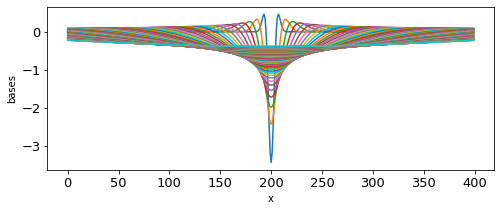

In [227]:
n_bases = 80
y_bases = base_set(np.arange(-200,200), n_bases)
plt.figure(figsize=(8,3))
for y in y_bases:
    plt.plot(y)
_=plt.ylabel("bases")
_=plt.xlabel("x")

### Moment Computing 

In [228]:
dist = {} 
moment_collection = [] 
for class_name in motions.classes:     
    moment = cal_momentComputing(class_name,n_bases)
    
    for m in moment: 
        moment_collection.append(m)
    
#    print(class_name, motions.filteredMotions[class_name].shape[0])
    dist[class_name] = motions.filteredMotions[class_name].shape[0]


### Build a dataset 

In [229]:
df = pd.DataFrame(np.array(moment_collection))
df.columns=['base'+str(i+1) for i in range(n_bases)] + ['class_name']
display(df.head())
display(df.tail())

base1               base2               base3  \
0   7146.974627007755  10563.790067539232  13653.800646394604   
1   9994.513872065938  14626.511350111627  18298.532434077493   
2   9155.582667432765  13416.759507009385  17209.525601739384   
3  11809.931997071617  17343.086503127633  21930.841082921608   
4  12651.346899756198   18633.83032061867   23818.49289762111   

                base4               base5               base6  \
0  16373.345212055385   18420.52051018493  19617.047945281414   
1  21288.442088559008    23439.7529241143  24547.690075483973   
2    20526.1254463387  23048.464672173115  24579.887534910078   
3   25748.68589053599  28627.548853298897  30344.271836734406   
4   28228.84944438396  31621.875465128738    33790.2091118597   

                base7               base8               base9  \
0   19994.98015804572  19706.814659610747  18938.129594854287   
1   24630.82050869769   23898.01721502633  22614.586066852564   
2  25131.156608557474    24857.0101686197   23967.45510960245   
3  30861.109714755497  30349.025878844317  29080.198912045962   
4   34691.73433263716   34473.24636736879  33392.029763273575   

               base10  ...               base72               base73  \
0  17861.577730953577  ...   360.37791895321465   352.18960977031986   
1  21017.747869657098  ...  -18.189173739218358  -26.919084858319806   
2  22668.738248401645  ...   -373.5691274583148   -381.1789908068404   
3   27330.15022895009  ...    48.89647824581905   36.900384031316015   
4  31725.700613137014  ...    825.8742133893999    806.6926151345926   

               base74               base75               base76  \
0  344.42840561742804   337.06511868971495   330.07290489256934   
1  -35.13081864231338  -42.859128662313076   -50.13608324226677   
2  -388.1940569128237  -394.65834970189843  -400.61230994604733   
3  25.617690071756023   14.999813105280662    5.001971307972063   
4   788.4588591757725    771.1116189518085    754.5942587741475   

                base77               base78               base79  \
0   323.42705204329417    317.1047890900638   311.08511409683547   
1   -56.99129957723459  -63.452155278597594   -69.54397971350082   
2  -406.09311627220916   -411.1349749301912    -415.769381576284   
3   -4.417149718866195  -13.295698673667593  -21.668931368612164   
4    738.8544282446485     723.843695260126    709.5172136405635   

                base80  class_name  
0     305.348638999899  fast/LR/1m  
1   -75.29022723946528  fast/LR/1m  
2   -420.0253579703558  fast/LR/1m  
3  -29.569457632882358  fast/LR/1m  
4    695.8334218507603  fast/LR/1m  

[5 rows x 81 columns]

base1               base2               base3  \
4445   6860.210766863073   9987.771059467894  12743.498590264904   
4446   7548.095569002524  10946.551995957538   13742.39470321285   
4447  7851.8954667500875  11303.616446059867  14126.632082436172   
4448     8235.9292385791   11843.83420248743  14764.615700045044   
4449  13369.847608998733  19394.327369963277  24445.243589602338   

                   base4               base5               base6  \
4445  15254.384477811655  17321.763559832536   18775.20974782702   
4446  16061.759532472039   17924.18310529258  19372.995444990094   
4447   16708.54405266654  19108.108580596112   21214.23705457624   
4448  17241.012181359452   19394.42218036394   21259.61791977365   
4449   28958.75044267886   32878.21155372953  36079.027444048115   

                   base7               base8               base9  \
4445   19575.31814493686   19785.72825275699  19521.287501001545   
4446  20494.532443874275   21368.26856798322  22029.462341124487   
4447  22915.345263202766  24145.580641232256  24882.300079049684   
4448  22801.290999513876  23972.397324186466  24740.478876549947   
4449   38465.71816159808   40025.80890463102   40821.72971136535   

                  base10  ...              base72               base73  \
4445    18905.4242028211  ...  -1150.397577087906  -1149.0025049323106   
4446  22473.655032452974  ...  1031.0906198441794   1000.5001139934998   
4447  25142.811663937027  ...   806.2280775666736     778.708954798139   
4448   25099.56301476561  ...   3578.421560485034    3542.400721975464   
4449  40958.610429029424  ...   2531.929315272516   2463.8945030745417   

                  base74              base75               base76  \
4445  -1147.139075573007  -1144.855514993084  -1142.1956293605308   
4446    971.511327024028   944.0206116240784    917.9320026760239   
4447   752.6378515831375   727.9219810696056    704.4753608442124   
4448   3507.685507607407   3474.199905434857   3441.8734182736835   
4449  2399.1597291306716   2337.530253420684   2278.8242279371116   

                   base77               base78               base79  \
4445  -1139.1992175001797  -1135.9024432915398  -1132.3381720444072   
4446    893.1565894532071    869.6119428634928    847.2215926891748   
4447    682.2182611097656     661.076701167863    640.9819897335417   
4448    3410.640608839227   3380.4406858216526    3351.217126974925   
4449     2222.87177832257   2169.5141535900348   2118.6029388635507   

                   base80     class_name  
4445  -1128.5362744811516  slow/RL/right  
4446    825.9145502434658  slow/RL/right  
4447    621.8703050383274  slow/RL/right  
4448   3322.9173356885713  slow/RL/right  
4449   2069.9993264335935  slow/RL/right  

[5 rows x 81 columns]

### Data augmentation using SMOTE

In [232]:
import imblearn
from imblearn.over_sampling import SMOTE 

y_org = df['class_name'].values
x_org = df.iloc[:,:n_bases].values 

sm = SMOTE(random_state=42)
X_augmented, y_augmented = sm.fit_resample(x_org, y_org)

In [233]:
X_augmented.shape

(7168, 80)

### Principal Component analysis

In [150]:
subClass = [] 

for class_name in motions.classes: 
    s = os.path.join(*class_name.split("/")[1:]) 
    if s not in subClass: 
        subClass.append(s)
    
print(subClass)

['LR/1m', 'LR/2m', 'LR/3m', 'LR/4m', 'LR/5m', 'LR/left', 'LR/right', 'RL/1m', 'RL/2m', 'RL/3m', 'RL/4m', 'RL/5m', 'RL/left', 'RL/right']


In [151]:
pairClass = [] 
for s in subClass: 
    pairClass.append(['fast/'+s, 'slow/'+ s])
    
for p in pairClass:
    print(p)

['fast/LR/1m', 'slow/LR/1m']
['fast/LR/2m', 'slow/LR/2m']
['fast/LR/3m', 'slow/LR/3m']
['fast/LR/4m', 'slow/LR/4m']
['fast/LR/5m', 'slow/LR/5m']
['fast/LR/left', 'slow/LR/left']
['fast/LR/right', 'slow/LR/right']
['fast/RL/1m', 'slow/RL/1m']
['fast/RL/2m', 'slow/RL/2m']
['fast/RL/3m', 'slow/RL/3m']
['fast/RL/4m', 'slow/RL/4m']
['fast/RL/5m', 'slow/RL/5m']
['fast/RL/left', 'slow/RL/left']
['fast/RL/right', 'slow/RL/right']


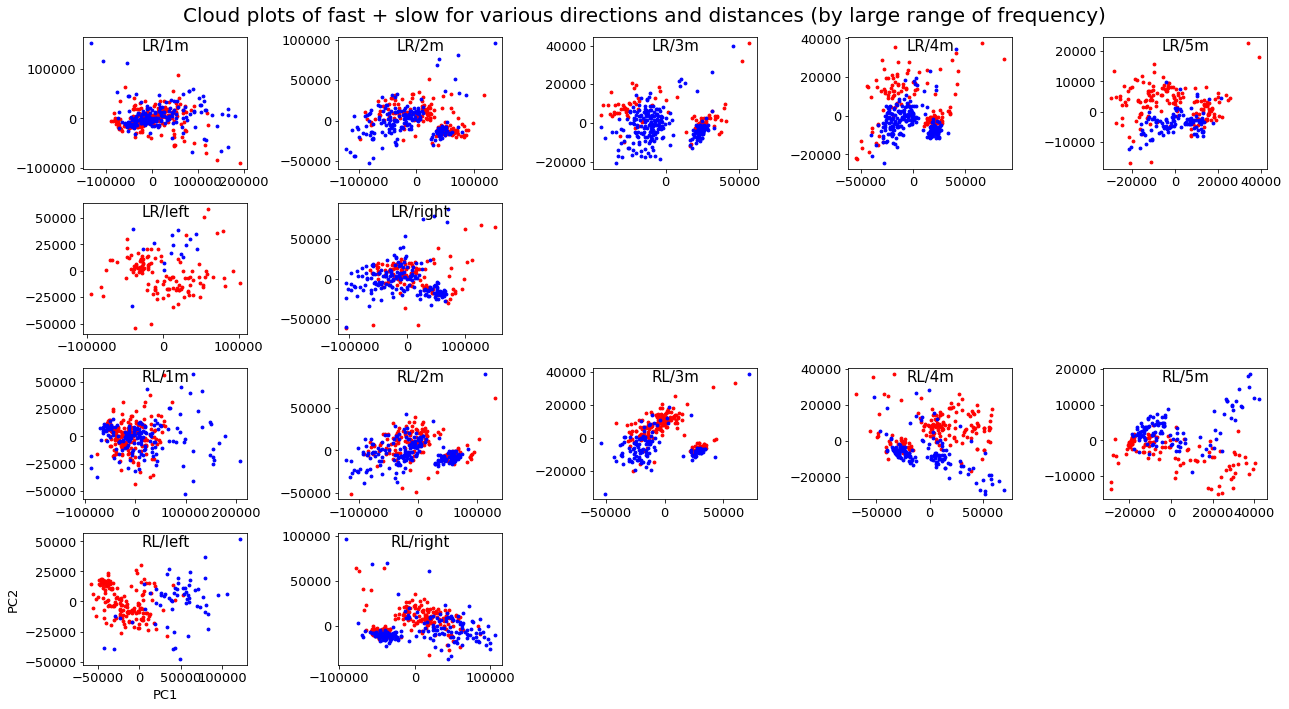

In [152]:
def PCA_for_speeds(class_pair):
    class1, class2 = class_pair
    df_fs = pd.concat([df[df['class_name']==class1], 
                       df[df['class_name']==class2]])
    target = df_fs.pop('class_name') 
    target.reset_index(drop=True,inplace=True) 
    X = df_fs
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents, columns = ['PC1', 'PC2'])
    finalDf = pd.concat([principalDf, target], axis = 1)
    
    return finalDf
    

def ListPlotClouds(): 
    
    fig = plt.figure(figsize=(18, 10), constrained_layout=False)
    n_row, n_col = 4, 5
    axs = fig.subplots(n_row, n_col)
    plt.suptitle("Cloud plots of fast + slow for various directions and distances (by large range of frequency)", 
                 fontsize=20)
    
    idx_pair = 0 
    for r in range(n_row):         
        for c in range(n_col):
            if r%2==1 and c > 1: 
                axs[r, c].axis('off')
            else: 
                axs[r, c].set_title(str(subClass[idx_pair]), 
                                    y=1.0, pad=-14, 
                                    c='k', 
                                    fontsize=15)
                df_pc = PCA_for_speeds(pairClass[idx_pair])
                class1,class2 = pairClass[idx_pair]
                df_cl1 = df_pc[df_pc['class_name']==class1]
                df_cl2 = df_pc[df_pc['class_name']==class2]
                axs[r, c].scatter(df_cl1['PC1'], df_cl1['PC2'], c='red', s=8)
                axs[r, c].scatter(df_cl2['PC1'], df_cl2['PC2'], c='blue', s=8)
                
                idx_pair +=1
    
    axs[3,0].set_xlabel('PC1', fontsize=13)
    axs[3,0].set_ylabel('PC2', fontsize=13)
    
    plt.tight_layout()
    plt.savefig('cloudPlotFordifferentSpeeds_largerRange.pdf')  

ListPlotClouds()

## Predictive models

### binary Classification 
#### Logistic Regression Model 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [16]:
def logisticRegression(class1, class2):
    df_fs = pd.concat([df[df['class_name']==class1], 
                       df[df['class_name']==class2]])
    df_fs = shuffle(df_fs)
    df_fs.reset_index(drop=True,inplace=True)
    
    n = df_fs.shape[0]
    train_df = df_fs[0:int(n*0.8)]
    test_df = df_fs[int(n*0.8):]

    train_y = train_df.pop('class_name')
    train_X = train_df  

    test_y = test_df.pop('class_name')
    test_X = test_df  

    clf = LogisticRegression(random_state=0).fit(train_X, train_y)

    return clf.score(test_X, test_y)

print(logisticRegression('fast/LR/1m', 'slow/LR/1m'))
print(logisticRegression('fast/LR/3m', 'slow/LR/3m'))
print(logisticRegression('fast/LR/5m', 'slow/LR/5m'))

0.8023255813953488
0.8857142857142857
0.9454545454545454


In [17]:
print(logisticRegression('fast/RL/1m', 'slow/RL/1m'))
print(logisticRegression('fast/RL/3m', 'slow/RL/3m'))
print(logisticRegression('fast/RL/5m', 'slow/RL/5m'))

0.7323943661971831
0.8
0.8125


In [18]:
print(logisticRegression('fast/RL/left', 'slow/RL/left'))
print(logisticRegression('fast/RL/right', 'slow/RL/right'))

0.9302325581395349
0.925


In [19]:
print(logisticRegression('fast/LR/left', 'slow/LR/left'))
print(logisticRegression('fast/LR/right', 'slow/LR/right'))

0.9642857142857143
0.9354838709677419


#### Neural Networks 

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split



In [21]:
def get_speeds_data(class1, class2):
    df_fs = pd.concat([df[df['class_name']==class1], 
                       df[df['class_name']==class2]])
    df_fs = shuffle(df_fs)
    df_fs.reset_index(drop=True,inplace=True)
    
    return df_fs

In [22]:
df_fs = get_speeds_data('fast/LR/1m', 'slow/LR/1m')
display(df_fs)

base1               base2               base3  \
0     9496.969425907573  11863.528978195745  13738.868562668413   
1    2919.8930466433344   3758.400027110237   4595.691001539708   
2     17234.50356961757   21903.56800551121    26493.6184970158   
3     2082.846619631876   2361.284259181133   2229.603865074417   
4    16426.558472574827  20789.433069448904   24275.10095920469   
..                  ...                 ...                 ...   
425  288.21922617828244  -226.0218571162311  -750.6892272826251   
426   19235.71978325083   24787.44220775664  29312.291065396057   
427   4860.402360619592   6166.440241836915   7246.451432806455   
428    16700.4572744924  21114.484510637387  24785.549349963367   
429  12747.267643875384  16392.013683368335   19536.55487395233   

                   base4                base5                base6  \
0     15125.595319734028   15959.184217336759   16252.726164044489   
1      5322.464843164917    5821.986697723126    6069.493822382468   
2     30911.002248750963    34866.39208367649   38107.947931484814   
3     1853.5655761613557   1448.9017009880013   1105.2609402577025   
4      26720.00579297074   27937.500377616925   27945.642192773048   
..                   ...                  ...                  ...   
425  -1180.6063664527767  -1526.1409926242522  -1840.5471203306377   
426   32283.183613368652    33508.54821596406    33207.07856292676   
427    8009.682371124805    8396.976614113608     8420.02910044299   
428     27492.2028164863    29004.98356522702   29327.823992127116   
429   21953.312468650012   23480.367326458407    24088.03955760746   

                   base7                base8               base9  \
0     16110.862089042643   15671.794598701606  15059.826338176506   
1     6088.6880368021575    5923.361627952243   5624.730147297284   
2      40464.94224403029    41856.24054589676   42297.54971304032   
3      836.5831362370652    632.2559101696895   477.6688140267185   
4       26970.2686767369     25321.5529449071  23290.119914721407   
..                   ...                  ...                 ...   
425  -2142.7388704500577  -2425.3135443901865  -2676.614940668972   
426    31804.64572616703   29731.880230002746   27329.25529047296   
427    8147.380546339695    7671.191305633168   7078.334375165207   
428   28670.910058707468   27318.831442370174   25539.15230984783   
429   23880.275502889315   23046.803975567396  21796.342753586803   

                 base10  ...              base32              base33  \
0     14367.25221486072  ...   6561.301180627541    6444.82696181832   
1     5241.697553286368  ...  204.55801753624252  154.37236884754336   
2     41885.61121703153  ...   4284.799129753044  3570.5722771785604   
3     360.1822754658993  ...  -83.44146888462778   -84.6739754716126   
4    21100.688571862076  ...    524.319390775994   360.7891082803901   
..                  ...  ...                 ...                 ...   
425  -2889.702303933408  ...  -3091.595092884626  -3058.792811491541   
426  24831.821115629275  ...  2042.6772440329746  1814.3078904058943   
427   6436.355952410273  ...  251.06874051862025  194.22191986405574   
428  23544.674953682523  ...  1748.5193483084508  1502.3592210596435   
429  20310.607067478493  ...  2629.3293621532116  2433.2826105546765   

                  base34              base35               base36  \
0      6335.740929674989   6233.305059265049    6136.868403951816   
1     109.97380355271315   70.69264135683707    35.93695375689194   
2     2920.4793079123524   2328.730701093883   1790.0139891856525   
3     -85.68860827189899  -86.51544580833459   -87.18004060209617   
4     217.43398760646807   91.78437608419654  -18.321273730279753   
..                   ...                 ...                  ...   
425  -3026.4836593354976    -2994.7198633815  -2963.5388674849564   
426   1607.7742000301678  1420.6806043102715   1250.9235387663134   
427    143.5211701393835    98.2592909748816    57.815111

In [23]:
y = df_fs.pop('class_name')
X = df_fs.values

In [24]:
X.shape, y.shape

((430, 40), (430,))

In [55]:
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Flatten
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

##### sklearn

In [26]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=20, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
def skln_binaryClassification(class1, class2):
    
    X = np.vstack((X_augmented[y_augmented == class1, :], 
                   X_augmented[y_augmented == class2, :]))
    y = np.hstack((y_augmented[y_augmented == class1], 
                   y_augmented[y_augmented == class2]))
    
    encoded_y = LabelEncoder().fit_transform(y)
    
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X, encoded_y, cv=kfold)
    
    print("{} vs {}".format(class1, class2))
    print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [28]:
# skln_binaryClassification('fast/LR/1m', 'slow/LR/1m')
# skln_binaryClassification('fast/LR/5m', 'slow/LR/5m')
# skln_binaryClassification('fast/LR/1m', 'fast/RL/1m')
# skln_binaryClassification('fast/LR/5m', 'fast/RL/5m')

##### tensorflow

In [29]:
def plot_loss(history, epochs): 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 2))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel("epochs")
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel("epochs")
    plt.title('Training and Validation Loss')
    plt.show()


In [30]:

# from keras import backend
# print(backend.tensorflow_backend._get_available_gpus())

In [31]:
def get_optimizer():
      return tf.keras.optimizers.Adam(learning_rate=0.01)


### Multiclass Classification 

#### sub-groups Classification 

In [32]:
def nn_binaryClassification(class1, class2, batch_size):

    X = np.vstack((X_augmented[y_augmented == class1, :], 
                   X_augmented[y_augmented == class2, :]))
    y = np.hstack((y_augmented[y_augmented == class1], 
                   y_augmented[y_augmented == class2]))
    
    print(X.shape, y.shape)
    
    # standardizing input features 
    scaled_X = StandardScaler().fit_transform(X)
    # ordinal encoding target value 
    encoded_y = LabelEncoder().fit_transform(y)
#    dummy_y = np_utils.to_categorical(encoded_y)
    
    # split into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(
                        scaled_X, encoded_y, test_size=0.3, random_state=0)

    
    model = keras.Sequential([
        keras.layers.Dense(8, input_shape=(scaled_X.shape[1],),
                            activation=tf.nn.elu, 
                            kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        keras.layers.Dense(1,activation=tf.nn.sigmoid),    
    ])

    model.compile(optimizer=get_optimizer(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    epoch = 500 
    history = model.fit(X_train, y_train, epochs=epoch,  
                        validation_split=0.2, 
                        batch_size=batch_size,
                        verbose=0)
    
    model.evaluate(X_test, y_test)
    
    plot_loss(history, epochs=epoch)

In [33]:
# %%time 
# batch_size = 32
# nn_binaryClassification('fast/RL/1m', 'fast/LR/1m', batch_size)
# nn_binaryClassification('fast/RL/2m', 'fast/LR/2m', batch_size)
# nn_binaryClassification('fast/RL/3m', 'fast/LR/3m', batch_size)
# nn_binaryClassification('fast/RL/4m', 'fast/LR/4m', batch_size)
# nn_binaryClassification('fast/RL/5m', 'fast/LR/5m', batch_size)

In [34]:
# %%time 
# nn_binaryClassification('slow/RL/1m', 'slow/LR/1m', batch_size)
# nn_binaryClassification('slow/RL/2m', 'slow/LR/2m', batch_size)
# nn_binaryClassification('slow/RL/3m', 'slow/LR/3m', batch_size)
# nn_binaryClassification('slow/RL/4m', 'slow/LR/4m', batch_size)
# nn_binaryClassification('slow/RL/5m', 'slow/LR/5m', batch_size)

In [35]:
# %%time
# nn_binaryClassification('fast/RL/1m', 'slow/RL/1m', batch_size)
# nn_binaryClassification('fast/RL/2m', 'slow/RL/2m', batch_size)
# nn_binaryClassification('fast/RL/3m', 'slow/RL/3m', batch_size)
# nn_binaryClassification('fast/RL/4m', 'slow/RL/4m', batch_size)
# nn_binaryClassification('fast/RL/5m', 'slow/RL/5m', batch_size)

In [36]:
speed_based = {}

for m in motions.classes:
    key = m[5:] 
    if m[:4] == 'fast': 
        different_speed = 'slow' + m[4:]
    else: 
        different_speed = 'fast' + m[4:]
    
    if key not in speed_based:
        speed_based[key] = [m, different_speed]
    
speed_based    

{'LR/1m': ['fast/LR/1m', 'slow/LR/1m'],
 'LR/2m': ['fast/LR/2m', 'slow/LR/2m'],
 'LR/3m': ['fast/LR/3m', 'slow/LR/3m'],
 'LR/4m': ['fast/LR/4m', 'slow/LR/4m'],
 'LR/5m': ['fast/LR/5m', 'slow/LR/5m'],
 'LR/left': ['fast/LR/left', 'slow/LR/left'],
 'LR/right': ['fast/LR/right', 'slow/LR/right'],
 'RL/1m': ['fast/RL/1m', 'slow/RL/1m'],
 'RL/2m': ['fast/RL/2m', 'slow/RL/2m'],
 'RL/3m': ['fast/RL/3m', 'slow/RL/3m'],
 'RL/4m': ['fast/RL/4m', 'slow/RL/4m'],
 'RL/5m': ['fast/RL/5m', 'slow/RL/5m'],
 'RL/left': ['fast/RL/left', 'slow/RL/left'],
 'RL/right': ['fast/RL/right', 'slow/RL/right']}

In [37]:
direction_based = {}

for m in motions.classes:
    key = m[:4] + m[7:] # m[5:7] + ".." + m[5:7][::-1] + m[7:]
    inverted_direction = m.replace(m[5:7],  m[5:7][::-1])
    
    if key not in direction_based:
        direction_based[key] = [m, inverted_direction]
    
direction_based    

{'fast/1m': ['fast/LR/1m', 'fast/RL/1m'],
 'fast/2m': ['fast/LR/2m', 'fast/RL/2m'],
 'fast/3m': ['fast/LR/3m', 'fast/RL/3m'],
 'fast/4m': ['fast/LR/4m', 'fast/RL/4m'],
 'fast/5m': ['fast/LR/5m', 'fast/RL/5m'],
 'fast/left': ['fast/LR/left', 'fast/RL/left'],
 'fast/right': ['fast/LR/right', 'fast/RL/right'],
 'slow/1m': ['slow/LR/1m', 'slow/RL/1m'],
 'slow/2m': ['slow/LR/2m', 'slow/RL/2m'],
 'slow/3m': ['slow/LR/3m', 'slow/RL/3m'],
 'slow/4m': ['slow/LR/4m', 'slow/RL/4m'],
 'slow/5m': ['slow/LR/5m', 'slow/RL/5m'],
 'slow/left': ['slow/LR/left', 'slow/RL/left'],
 'slow/right': ['slow/LR/right', 'slow/RL/right']}

In [38]:
distance_based = {}
distance_based['fast/LR/1m...5m'] = motions.classes[:5]
distance_based['fast/RL/1m...5m'] = motions.classes[7:7+5]
distance_based['slow/LR/1m...5m'] = motions.classes[14:14+5]
distance_based['slow/RL/1m...5m'] = motions.classes[-7:-2]
distance_based

{'fast/LR/1m...5m': ['fast/LR/1m',
  'fast/LR/2m',
  'fast/LR/3m',
  'fast/LR/4m',
  'fast/LR/5m'],
 'fast/RL/1m...5m': ['fast/RL/1m',
  'fast/RL/2m',
  'fast/RL/3m',
  'fast/RL/4m',
  'fast/RL/5m'],
 'slow/LR/1m...5m': ['slow/LR/1m',
  'slow/LR/2m',
  'slow/LR/3m',
  'slow/LR/4m',
  'slow/LR/5m'],
 'slow/RL/1m...5m': ['slow/RL/1m',
  'slow/RL/2m',
  'slow/RL/3m',
  'slow/RL/4m',
  'slow/RL/5m']}

#### multi-class classification 

In [39]:
def nn_multiClass_Classification(class_list, batch_size):
    n_classes = len(class_list)
    print("list of classes (n_classes={})".format(n_classes))
    for c in class_list: print(c)    
    print("---")

    y = []
    X_multiClass = []
    for m in class_list:
        X_multiClass.append(X_augmented[y_augmented == m])
        y.append(y_augmented[y_augmented == m])

    X = np.vstack(X_multiClass)
    y = np.hstack(y)
    
    print("size of dataset: input {} and target {}".format(X.shape, y.shape))
        
    # standardizing input features 
    scaled_X = StandardScaler().fit_transform(X)
    # ordinal encoding target value 
    encoded_y = LabelEncoder().fit_transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)
        
    # split into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(
                        scaled_X, dummy_y, test_size=0.3, random_state=0)

    model = keras.Sequential([
        keras.layers.Dense(16, input_dim=X.shape[1], 
                           kernel_regularizer=regularizers.l2(0.001),
                           activation='elu'),
        Dropout(0.5),                
        keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                   activation='elu'),
        Dropout(0.5),                

        keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                   activation='elu'),
        Dropout(0.5),                

        keras.layers.Dense(n_classes, activation='softmax'),    
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    epoch = 200 
    history = model.fit(X_train, y_train, 
                        epochs=epoch,  
                        validation_split=0.2, 
                        batch_size=batch_size,
                        verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test)    

    plot_loss(history, epochs=epoch)

    return loss, accuracy

##### Distance-based Classification 

fast/LR/1m...5m
list of classes (n_classes=5)
fast/LR/1m
fast/LR/2m
fast/LR/3m
fast/LR/4m
fast/LR/5m
---
size of dataset: input (1280, 40) and target (1280,)
Metal device set to: Apple M1


2021-08-20 15:29:23.269061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-20 15:29:23.269162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-08-20 15:29:23.330766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-20 15:29:23.330934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-20 15:29:23.483916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:29:23.834618: I tensorflow/core/grappler/

12/12 [==============================] - 0s 6ms/step - loss: 0.9528 - accuracy: 0.6198


2021-08-20 15:30:06.743403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


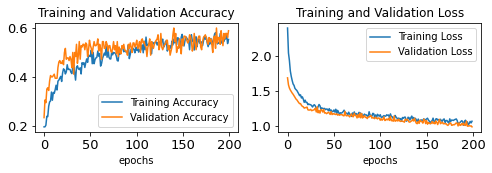

fast/RL/1m...5m
list of classes (n_classes=5)
fast/RL/1m
fast/RL/2m
fast/RL/3m
fast/RL/4m
fast/RL/5m
---
size of dataset: input (1280, 40) and target (1280,)


2021-08-20 15:30:07.182164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:30:07.469505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 5ms/step - loss: 0.7337 - accuracy: 0.7083


2021-08-20 15:46:42.541639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


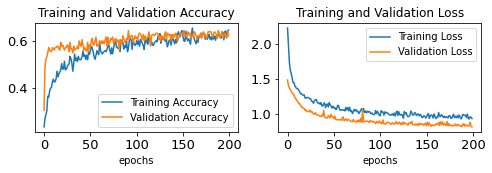

slow/LR/1m...5m
list of classes (n_classes=5)
slow/LR/1m
slow/LR/2m
slow/LR/3m
slow/LR/4m
slow/LR/5m
---
size of dataset: input (1280, 40) and target (1280,)


2021-08-20 15:46:42.863310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:46:43.158201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 5ms/step - loss: 0.7128 - accuracy: 0.6875


2021-08-20 15:47:25.380191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


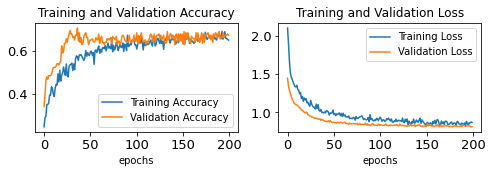

slow/RL/1m...5m
list of classes (n_classes=5)
slow/RL/1m
slow/RL/2m
slow/RL/3m
slow/RL/4m
slow/RL/5m
---
size of dataset: input (1280, 40) and target (1280,)


2021-08-20 15:47:25.701173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:47:25.992705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 5ms/step - loss: 0.7116 - accuracy: 0.7031


2021-08-20 15:48:07.999878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


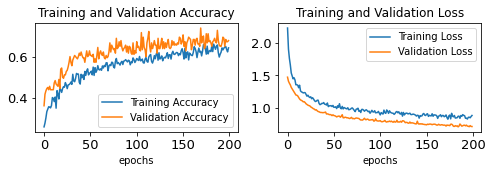

CPU times: user 2min 37s, sys: 1min 34s, total: 4min 11s
Wall time: 18min 44s


In [40]:
%%time
res={}
for key in distance_based.keys(): 
    print(key)
    res[key] = nn_multiClass_Classification(distance_based[key], batch_size=32)
    

In [41]:
def plot_subclass_classification_result(res, figure_title):
    df = pd.DataFrame(res).T
    df.columns = ["loss", "accuracy"]
    
    df.plot(y=["loss", "accuracy"], kind="bar", figsize=(10,3))
    _ = plt.xticks(rotation=0)

    plt.title(figure_title,fontsize=13)
    #plt.xlabel("Sub-class group",fontsize=13)
    plt.ylabel("Evaluation score",fontsize=13)
    plt.xticks(rotation=30)
    

    if max(df.max()) < 1: 
        plt.ylim(0, 1)
        
    _ = plt.legend(fontsize=13, bbox_to_anchor=(1.,1), loc='upper left')
    plt.grid(color='grey',linestyle='--',linewidth=0.5,axis='y', alpha=0.3)

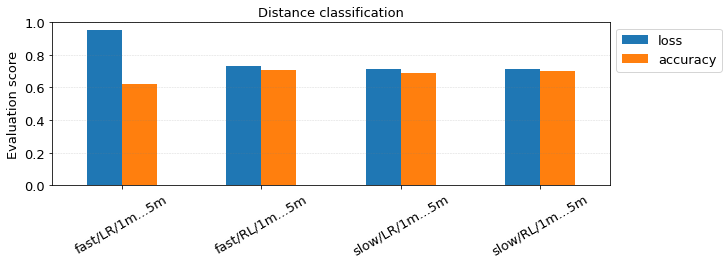

In [42]:
plot_subclass_classification_result(res, "Distance classification")

##### Direction-based Classification 

list of classes (n_classes=2)
fast/LR/1m
fast/RL/1m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:48:08.409228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:48:08.593019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.6688


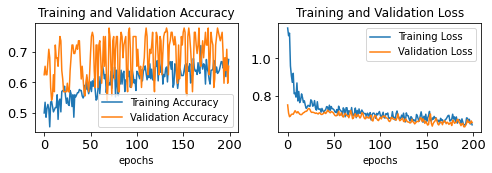

list of classes (n_classes=2)
fast/LR/2m
fast/RL/2m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:48:27.322708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:48:27.507428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 6ms/step - loss: 0.6688 - accuracy: 0.6558


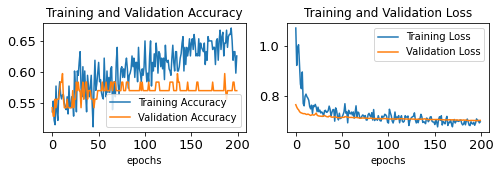

list of classes (n_classes=2)
fast/LR/3m
fast/RL/3m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:48:46.227282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:48:46.411218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.6478 - accuracy: 0.7143


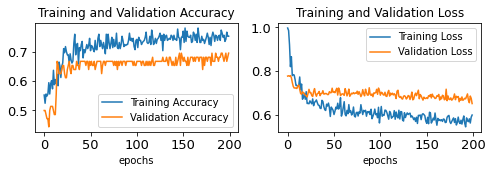

list of classes (n_classes=2)
fast/LR/4m
fast/RL/4m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:49:05.429119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:49:05.612318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 6ms/step - loss: 0.6354 - accuracy: 0.6688


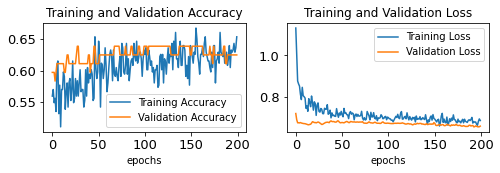

list of classes (n_classes=2)
fast/LR/5m
fast/RL/5m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:49:24.665322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:49:24.848256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.7013


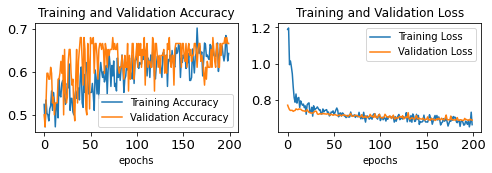

list of classes (n_classes=2)
fast/LR/left
fast/RL/left
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:49:43.705247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:49:43.889015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 6ms/step - loss: 0.4846 - accuracy: 0.7532


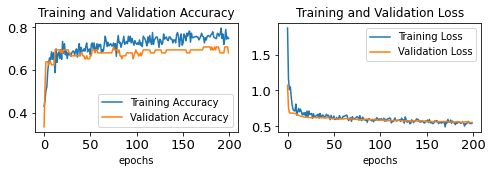

list of classes (n_classes=2)
fast/LR/right
fast/RL/right
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:50:02.601450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:50:02.787990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5909


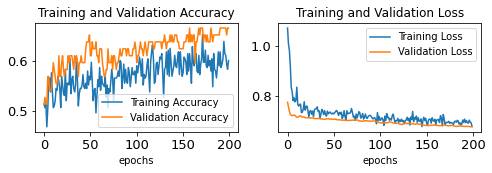

list of classes (n_classes=2)
slow/LR/1m
slow/RL/1m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:50:21.548843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:50:21.734219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.6598 - accuracy: 0.6753


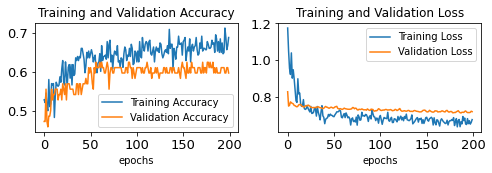

list of classes (n_classes=2)
slow/LR/2m
slow/RL/2m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:50:40.291856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:50:40.474930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.6321 - accuracy: 0.6948


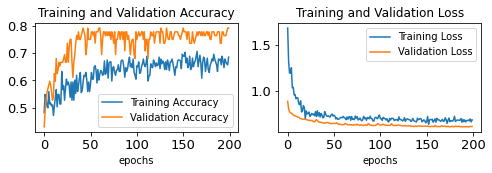

list of classes (n_classes=2)
slow/LR/3m
slow/RL/3m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:51:21.432207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:51:21.616889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.4255 - accuracy: 0.8766


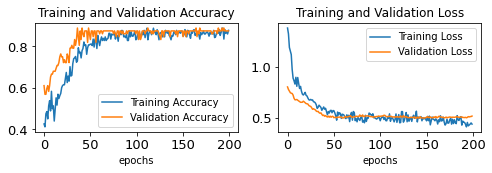

list of classes (n_classes=2)
slow/LR/4m
slow/RL/4m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:51:41.169905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:51:41.357444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 9ms/step - loss: 0.5529 - accuracy: 0.8182


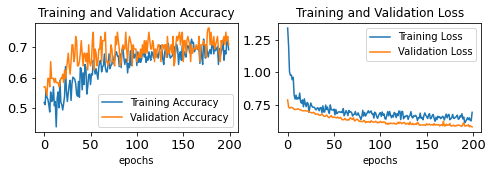

list of classes (n_classes=2)
slow/LR/5m
slow/RL/5m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:52:02.339090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:52:02.539030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.3120 - accuracy: 0.9221


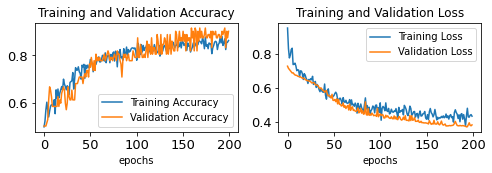

list of classes (n_classes=2)
slow/LR/left
slow/RL/left
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:52:23.350694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:52:23.543255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.2747 - accuracy: 0.9091


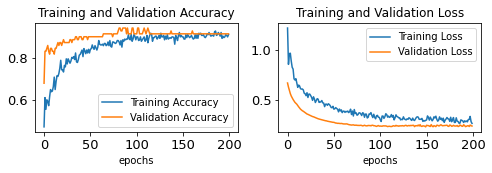

list of classes (n_classes=2)
slow/LR/right
slow/RL/right
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:52:43.675092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:52:43.866792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.4972 - accuracy: 0.7987


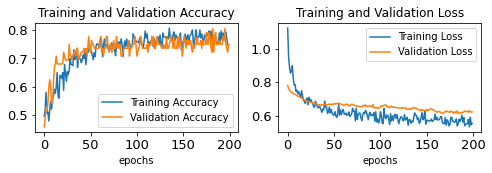

CPU times: user 4min 6s, sys: 2min 21s, total: 6min 28s
Wall time: 4min 55s


In [43]:
%%time 
res_direction_based = {} 
for key, val in direction_based.items():
    #print(key, val, type(val))
    res_direction_based[key] = nn_multiClass_Classification(val, batch_size=32)

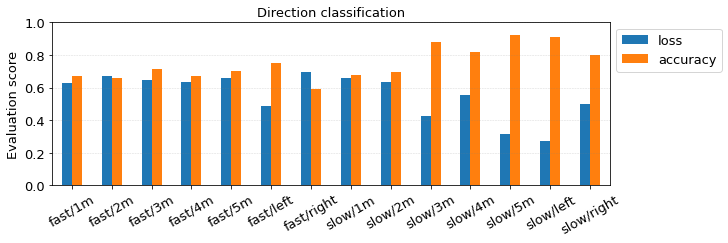

In [44]:
plot_subclass_classification_result(res_direction_based, "Direction classification")

list of classes (n_classes=2)
fast/LR/1m
slow/LR/1m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:53:03.912168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:53:04.101322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.5549 - accuracy: 0.7597


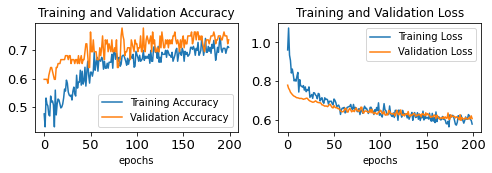

list of classes (n_classes=2)
fast/LR/2m
slow/LR/2m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:53:24.222473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:53:24.412545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.3651 - accuracy: 0.8961


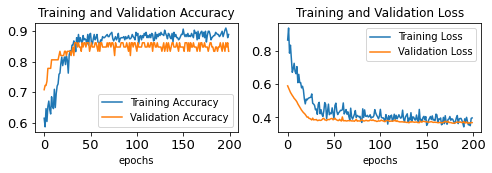

list of classes (n_classes=2)
fast/LR/3m
slow/LR/3m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:53:44.420199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:53:44.608944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.3156 - accuracy: 0.9156


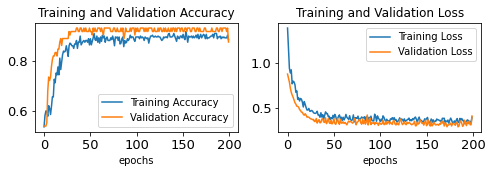

list of classes (n_classes=2)
fast/LR/4m
slow/LR/4m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:54:04.480592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:54:04.670252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.2584 - accuracy: 0.9351


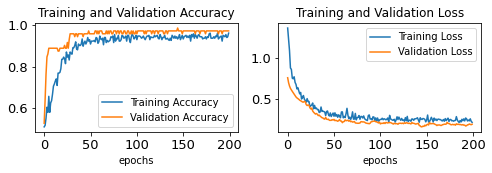

list of classes (n_classes=2)
fast/LR/5m
slow/LR/5m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:54:24.567531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:54:24.756506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.1149 - accuracy: 0.9740


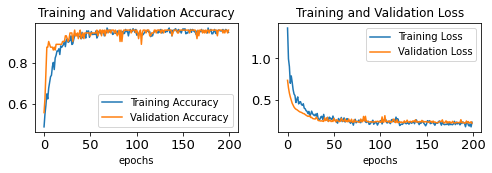

list of classes (n_classes=2)
fast/LR/left
slow/LR/left
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:54:44.650346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:54:44.839409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.0507 - accuracy: 1.0000


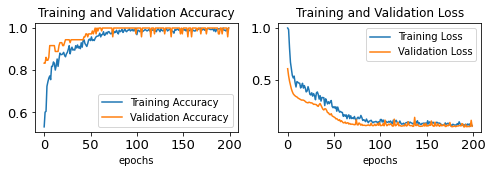

list of classes (n_classes=2)
fast/LR/right
slow/LR/right
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:55:04.739314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:55:04.929612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.3761 - accuracy: 0.8377


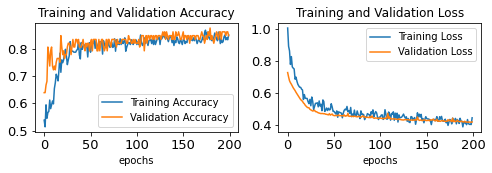

list of classes (n_classes=2)
fast/RL/1m
slow/RL/1m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:55:25.044936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:55:25.236918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.5294 - accuracy: 0.7468


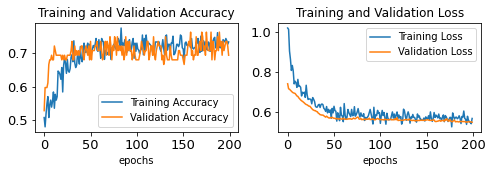

list of classes (n_classes=2)
fast/RL/2m
slow/RL/2m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:55:46.092287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:55:46.279110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.4900 - accuracy: 0.7597


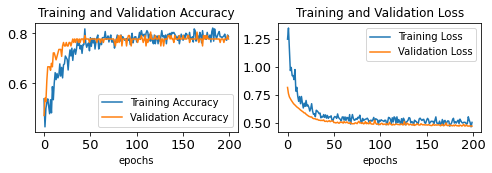

list of classes (n_classes=2)
fast/RL/3m
slow/RL/3m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:56:06.137696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:56:06.326291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.2821 - accuracy: 0.9156


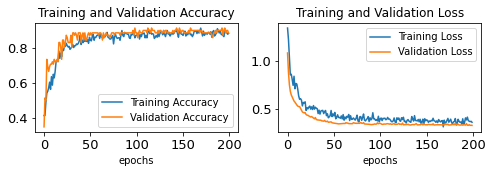

list of classes (n_classes=2)
fast/RL/4m
slow/RL/4m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:56:27.306322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:56:27.497094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.9221


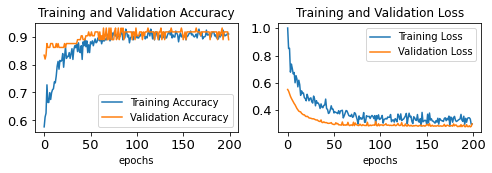

list of classes (n_classes=2)
fast/RL/5m
slow/RL/5m
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:56:47.713876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:56:47.903634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.2481 - accuracy: 0.9416


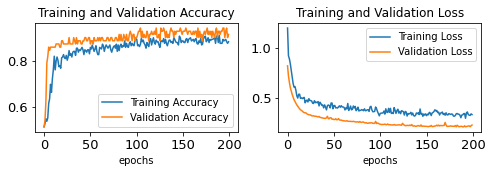

list of classes (n_classes=2)
fast/RL/left
slow/RL/left
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:57:08.874999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:57:09.071521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 9ms/step - loss: 0.2815 - accuracy: 0.9026


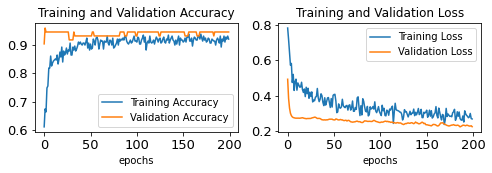

list of classes (n_classes=2)
fast/RL/right
slow/RL/right
---
size of dataset: input (512, 40) and target (512,)


2021-08-20 15:57:30.163436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:57:30.383499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.3628 - accuracy: 0.9156


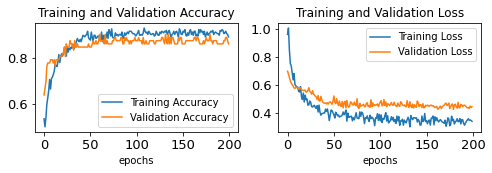

CPU times: user 4min 11s, sys: 2min 29s, total: 6min 40s
Wall time: 4min 47s


In [45]:
%%time 
res_speed_based = {} 
for key, val in speed_based.items():
    res_speed_based[key] = nn_multiClass_Classification(val, batch_size=32)

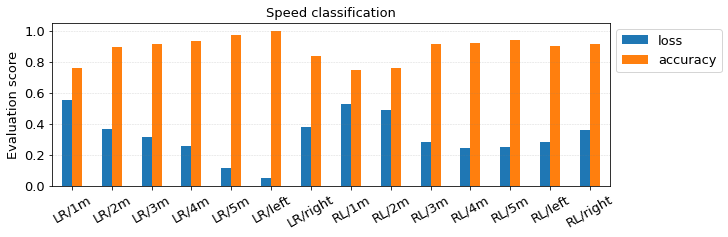

In [46]:
plot_subclass_classification_result(res_speed_based,"Speed classification")

list of classes (n_classes=14)
fast/LR/1m
fast/LR/2m
fast/LR/3m
fast/LR/4m
fast/LR/5m
fast/LR/left
fast/LR/right
fast/RL/1m
fast/RL/2m
fast/RL/3m
fast/RL/4m
fast/RL/5m
fast/RL/left
fast/RL/right
---
size of dataset: input (3584, 40) and target (3584,)


2021-08-20 15:57:51.575081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:57:52.206670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 6ms/step - loss: 1.8794 - accuracy: 0.3076


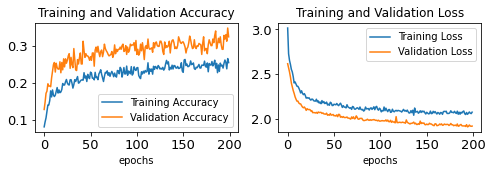

CPU times: user 1min 47s, sys: 1min 5s, total: 2min 53s
Wall time: 1min 59s


(1.8793960809707642, 0.3076208233833313)

In [47]:
%%time
nn_multiClass_Classification(motions.classes[:14], batch_size=32)

list of classes (n_classes=14)
slow/LR/1m
slow/LR/2m
slow/LR/3m
slow/LR/4m
slow/LR/5m
slow/LR/left
slow/LR/right
slow/RL/1m
slow/RL/2m
slow/RL/3m
slow/RL/4m
slow/RL/5m
slow/RL/left
slow/RL/right
---
size of dataset: input (3584, 40) and target (3584,)


2021-08-20 15:59:51.335285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 15:59:51.990270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 6ms/step - loss: 1.5573 - accuracy: 0.3838


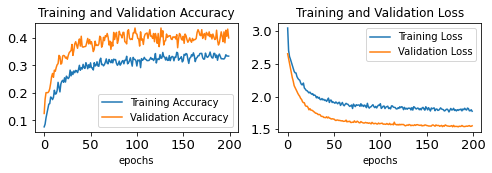

CPU times: user 1min 50s, sys: 1min 8s, total: 2min 59s
Wall time: 2min 4s


(1.557320237159729, 0.3838289976119995)

In [48]:
%%time
nn_multiClass_Classification(motions.classes[14:], batch_size=32)

#### One vs Rest Classifier

In [49]:
def full_dataset(motion_list):
    y, X_multiClass = [], []
    for m in motion_list:
        print(m)
        X_multiClass.append(X_augmented[y_augmented == m])
        y.append(y_augmented[y_augmented == m])

    X = np.vstack(X_multiClass)
    y = np.hstack(y)
    
    print("size of dataset: input {} and target {}".format(X.shape, y.shape))
    
    # standardizing input features 
    scaled_X = StandardScaler().fit_transform(X)
    # ordinal encoding target value 
    encoded_y = LabelEncoder().fit_transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    #dummy_y = np_utils.to_categorical(encoded_y)
    
    print("size of dataset: input {} and target {}".format(scaled_X.shape, encoded_y.shape))

    X_train, X_test, y_train, y_test = train_test_split(
                    scaled_X, encoded_y, test_size=0.3, random_state=0)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = full_dataset(motions.classes)

fast/LR/1m
fast/LR/2m
fast/LR/3m
fast/LR/4m
fast/LR/5m
fast/LR/left
fast/LR/right
fast/RL/1m
fast/RL/2m
fast/RL/3m
fast/RL/4m
fast/RL/5m
fast/RL/left
fast/RL/right
slow/LR/1m
slow/LR/2m
slow/LR/3m
slow/LR/4m
slow/LR/5m
slow/LR/left
slow/LR/right
slow/RL/1m
slow/RL/2m
slow/RL/3m
slow/RL/4m
slow/RL/5m
slow/RL/left
slow/RL/right
size of dataset: input (7168, 40) and target (7168,)
size of dataset: input (7168, 40) and target (7168,)


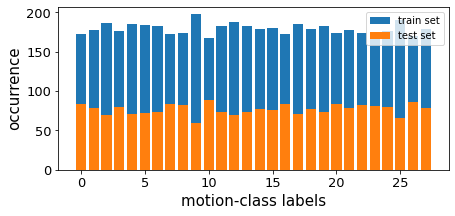

In [50]:
d1 = Counter(y_train)
d2 = Counter(y_test)

plt.figure(figsize=(7,3))
plt.bar(d1.keys(), d1.values(), label="train set") 
plt.bar(d2.keys(), d2.values(), label="test set")
plt.xlabel("motion-class labels", fontsize=15)
plt.ylabel("occurrence",fontsize=15)
plt.legend()
plt.show()

In [51]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

dnns_classifier = OneVsRestClassifier(
                    MLPClassifier(hidden_layer_sizes = [100]*10), n_jobs=-1)
dnns_classifier.fit(X_train, y_train)
dnns_predictions_labels = dnns_classifier.predict(X_test)

print("accuracy: {}".format(np.count_nonzero(y_test == dnns_predictions_labels)/len(y_test)))

accuracy: 0.49697814969781495
CPU times: user 3.32 s, sys: 738 ms, total: 4.06 s
Wall time: 1min 1s


In [52]:
X_train.shape

(5017, 40)

In [53]:
%%time 

svm_classifier = OneVsRestClassifier(SVC(decision_function_shape='ovr'), n_jobs=-1)
svm_classifier.fit(X_train, y_train)
svm_predictions_labels = svm_classifier.predict(X_test)

print("accuracy: {}".format(np.count_nonzero(y_test == svm_predictions_labels)/len(y_test)))

accuracy: 0.41841004184100417
CPU times: user 2.27 s, sys: 187 ms, total: 2.46 s
Wall time: 2.91 s


In [83]:
y_train

array([16,  6,  1, ...,  6, 10, 10])

### CNN (1D)

In [242]:
from keras.layers import Conv1D
    
def CNN_multiClass_Classification(class_list, batch_size):
    
    n_classes = len(class_list)
    print("list of classes (n_classes={})".format(n_classes))
    for c in class_list: print(c)    
    print("---")

    y = []
    X_multiClass = []
    for m in class_list:
        X_multiClass.append(X_augmented[y_augmented == m])
        y.append(y_augmented[y_augmented == m])

    X = np.vstack(X_multiClass)
    y = np.hstack(y)
    
    print("size of dataset: input {} and target {}".format(X.shape, y.shape))
        
    # standardizing input features 
    scaled_X = StandardScaler().fit_transform(X)
    # ordinal encoding target value 
    encoded_y = LabelEncoder().fit_transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)
        
    # split into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(
                        scaled_X, dummy_y, test_size=0.3, random_state=0)
    
    X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    print(X_train_cnn.shape)
    print(X_test_cnn.shape)

    model = Sequential()
    model.add(Conv1D(filters = 128, kernel_size = 10, 
                     activation = 'relu', 
                     input_shape = (X_train_cnn.shape[1],1),
                     kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(n_classes, activation = 'softmax'))

    model.compile(optimizer="adam",
                  loss='categorical_crossentropy', metrics=['accuracy'])

    epoch = 400 
    history = model.fit(X_train_cnn, y_train, 
                        epochs=epoch,  
                        validation_split=0.2, 
                        batch_size=batch_size,
                        verbose=0)

    loss, accuracy = model.evaluate(X_test_cnn, y_test)    

    plot_loss(history, epochs=epoch)

    return loss, accuracy

list of classes (n_classes=14)
slow/LR/1m
slow/LR/2m
slow/LR/3m
slow/LR/4m
slow/LR/5m
slow/LR/left
slow/LR/right
slow/RL/1m
slow/RL/2m
slow/RL/3m
slow/RL/4m
slow/RL/5m
slow/RL/left
slow/RL/right
---
size of dataset: input (3584, 80) and target (3584,)
(2508, 80, 1)
(1076, 80, 1)


2021-08-20 20:34:48.297564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 20:34:48.847010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 7ms/step - loss: 1.0047 - accuracy: 0.7063


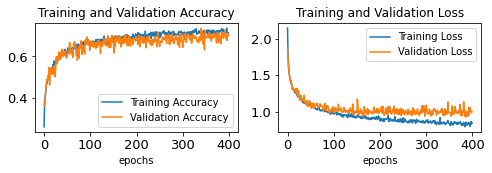

CPU times: user 2min 12s, sys: 1min 30s, total: 3min 43s
Wall time: 2min 55s


(1.0047450065612793, 0.7063196897506714)

In [243]:
%%time 
CNN_multiClass_Classification(motions.classes[14:], batch_size=32)

list of classes (n_classes=14)
fast/LR/1m
fast/LR/2m
fast/LR/3m
fast/LR/4m
fast/LR/5m
fast/LR/left
fast/LR/right
fast/RL/1m
fast/RL/2m
fast/RL/3m
fast/RL/4m
fast/RL/5m
fast/RL/left
fast/RL/right
---
size of dataset: input (3584, 80) and target (3584,)
(2508, 80, 1)
(1076, 80, 1)


2021-08-20 20:37:44.169304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 20:37:44.644041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 7ms/step - loss: 1.2430 - accuracy: 0.6171


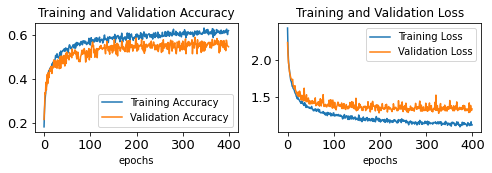

CPU times: user 2min 24s, sys: 1min 33s, total: 3min 57s
Wall time: 2min 45s


(1.2429823875427246, 0.6171003580093384)

In [244]:
%%time 
CNN_multiClass_Classification(motions.classes[:14], batch_size=32)

list of classes (n_classes=28)
fast/LR/1m
fast/LR/2m
fast/LR/3m
fast/LR/4m
fast/LR/5m
fast/LR/left
fast/LR/right
fast/RL/1m
fast/RL/2m
fast/RL/3m
fast/RL/4m
fast/RL/5m
fast/RL/left
fast/RL/right
slow/LR/1m
slow/LR/2m
slow/LR/3m
slow/LR/4m
slow/LR/5m
slow/LR/left
slow/LR/right
slow/RL/1m
slow/RL/2m
slow/RL/3m
slow/RL/4m
slow/RL/5m
slow/RL/left
slow/RL/right
---
size of dataset: input (7168, 80) and target (7168,)
(5017, 80, 1)
(2151, 80, 1)


2021-08-20 20:40:29.230913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-20 20:40:29.966290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 1s 7ms/step - loss: 1.7199 - accuracy: 0.5695


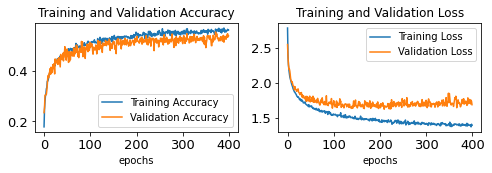

CPU times: user 4min 29s, sys: 3min 1s, total: 7min 31s
Wall time: 4min 59s


(1.7199337482452393, 0.5695025324821472)

In [245]:
%%time 
CNN_multiClass_Classification(motions.classes, batch_size=32)

### LSTM 